# Plotting data with Seaborn and matplotlib

Your ability to understand and communicate data is often entirely dependent on your ability to make a visual representation of that data. The most widely used python libraries for plotting scientific data are `matplotlib` and `seaborn`.

## Key Takeaways:

In today's class we will explore the wide range of python plotting options. We will:

 - Use Relational Plots to compare samples, getting a visual readout of variability
 - Use Distribution Plots using histograms and density plots
 - Use Categorical Plots to generate focused plots looking at that gene's expression


First, we need to import `pyplot` and `seaborn`. While we're at it, let's import numpy and pandas to store and manipulate data prior to plotting.

In [1]:
# Start with importing the packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline

Next, we will import the melanoma data we used in the prior class using `pd.read_csv()` and `pd.read_excel()`.

The data file is tab separated, and the first column has the gene names.

Remember that most things in python are zero-indexed, so the first column is index 0.

In [2]:
# Now to import some data to work with:
df = pd.read_csv('../Pabio536/C4C5_ Numpy_and_pandas/data/GSE88741-expression.txt', sep='\t', index_col=0)
df_sample = df.sample(100, axis = 0, random_state = 333)
meta = pd.read_excel("../Pabio536/C4C5_ Numpy_and_pandas/data/GSE88741-metadata.xlsx", index_col=1)
print (df_sample.head())
print (meta.head())

# Assigning the sample titles to the columns in the data frame with the expression values
columns = meta.index
df_sample.columns = columns
print (df_sample.head())


             GSM2344965  GSM2344966  GSM2344967  GSM2344968  GSM2344969  \
gene_symbol                                                               
ASPDH                 1           1           1           4           0   
KRT18P19              0           0           0           1           0   
ANKIB1             2578        2432        2067        2634        3238   
AGGF1P6               0           0           0           0           0   
ZNF618             1489        1441        1089         997        1088   

             GSM2344970  GSM2344971  GSM2344972  GSM2344973  GSM2344974  \
gene_symbol                                                               
ASPDH                 1           2           1           1           2   
KRT18P19              0           2           1           2           0   
ANKIB1             3158        2373        1908        2324        2918   
AGGF1P6               0           0           0           0           2   
ZNF618              994 

For the purposes of this exercise, we'll want to look at log2-transformed data values.

To do this without getting too many negative infinity values, we'll focus on genes that have median counts greater than 5, and will nudge the values that have 0 counts to be 0.01.

In [3]:
# Subset on genes that have a median count greater than 5
dfmed = df_sample.median(1)
dfnz = df_sample.loc[dfmed > 5,]

mask1 = (dfnz == 0)

# We will also nudge the values that have 0 counts to be 0.01.
dfnz[mask1] = 0.01

# Do the log2 transform
df_log2 = dfnz.transform(np.log2)
print(df_log2.head())

Sample Title       FM_1       FM_2       FM_3  SK_MEL_28_1  SK_MEL_28_2  \
gene_symbol                                                               
ANKIB1        11.332037  11.247928  11.013323    11.363040    11.660887   
ZNF618        10.540128  10.492855  10.088788     9.961450    10.087463   
IMPG2          3.700440   3.169925   3.906891     2.000000     1.000000   
SLC26A6       10.112440   9.575539  10.558421     9.816984    10.142107   
MAPKAPK3      10.664447  10.799282  10.487840     9.903882     9.995767   

Sample Title  SK_MEL_28_3  SK_MEL_147_1  SK_MEL_147_2  SK_MEL_147_3  \
gene_symbol                                                           
ANKIB1          11.624795     11.212496     10.897845     11.182394   
ZNF618           9.957102     10.927037     10.570804     10.659104   
IMPG2            2.584963      4.169925      3.807355      3.700440   
SLC26A6          9.936638      9.768184     10.029287      9.824959   
MAPKAPK3        10.075479     11.240791     11.2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


## A brief dabble into `matplotlib`'s `pyplot`:

The plotting functionalities we're going to be talking about from `pyplot` and `seaborn` are all based on functions from the `matplotlib` package. We're going to do the majority of our plotting with `seaborn` since the code is cleaner and the plots are prettier, but it's useful to see how you can plot something with the base case.

Fundamentally, when you ask `pyplot` to create a plot, it's creating 3 layers of objects, illustrated here:

<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" alt="Objects of a pyplot figure" title = "Pyplot hierarchy"/>

1. a "figure": a container for 1 or more plots.
1. an "axes": each individual plot within a _figure_.
1. a set of plot components (e.g, x-axis, y-axis, legends, labels, etc) within each _axes_.

`pyplot` treats each element of a plot as a separate object. A figure is the whole figure, and axes is one subplot within that figure. You can create and manipulate each part of the figure.

The image below is a visual glossary to help you see of all the features you can adjust within a `pyplot` figure:

<img src="https://files.realpython.com/media/anatomy.7d033ebbfbc8.png" alt="Objects of a pyplot figure" title = "Pyplot hierarchy"/>

***

The most explicit way to plot something is to use a function to define the "figure" and "axes" objects, then modify the "axes" by filling it with specific pieces:

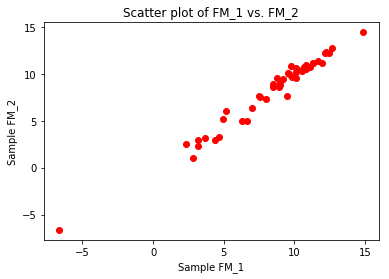

In [12]:
# define the figure and axes objects, assigning to the variables "fig" and "ax," respectively.
fig, ax = plt.subplots() # Note: this is your opportunity to define how many plots you want in a figure, and what is your desired figure size (with arguments added to plt.subplots())
ax.scatter(x = df_log2['FM_1'], y = df_log2['FM_2'], marker = 'o', color = 'r') # This tells that you want a scatter plot 
# plot modifiers
ax.set_title('Scatter plot of FM_1 vs. FM_2')
ax.set_xlabel('Sample FM_1')
ax.set_ylabel('Sample FM_2')
plt.show()

This gets kind of clunky, so pyplot enables a more streamlined way of plotting, which __implicitly__ modifies the most recent "axes" object that's being acted on:

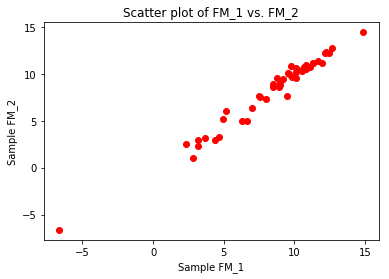

In [14]:
plt.scatter(x = df_log2['FM_1'], y = df_log2['FM_2'], marker = 'o', color = 'r')
plt.title('Scatter plot of FM_1 vs. FM_2')
plt.xlabel('Sample FM_1')
plt.ylabel('Sample FM_2')
plt.show()

The benefit of this approach is that it's easier to read, and easier to type. But, if you've got multiple axes objects within a figure, `pyplot` may end up making the wrong adjustments/plots in the wrong axes/plot area.

For more information about pyplot, the following websites are good resources:

 - https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python
 - https://realpython.com/python-matplotlib-guide/

## Seaborn plotting

`seaborn` is the package to use if you want to make some fancier, prettier, more customized plots, so we're going to spend the rest of our time focusing on using this. Note though that you will still be modifying `seaborn` figures with `pyplot` functions. 

### Relational Plots

We mentioned in an earlier class that `pandas` is built on top of `numpy` to provide easier syntax, easier to read code, and more visually appealing tables. Similarly, `seaborn` is a wrapper around `matplotlib` that makes a fairly complex but powerful library more accessible. We will be showing you both at the same time, as we think `seaborn` is easier to learn and use.  

Scatter plots or line plots are useful for showing the __relationship__ between two variables, which we can plot using the `seaborn` function `relplot`. Let's start by comparing two replicate samples, `FM_1` and `FM_2` across all genes in our log2 transformed sampleset.

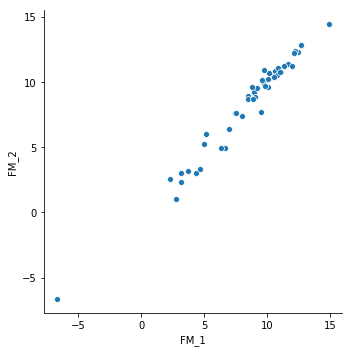

In [92]:
g = sns.relplot(x="FM_1", y="FM_2", data=df_log2)
plt.show()

So, right off the bat we are mixing sns and plt. In the first line of code we are calling the `sns` function `relplot`, which defaults to a scatterplot. This website gives more information about what you can do with the `relplot` function: https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial

For example, you can also use `relplot` to show lines by changing the "kind" argument (give it a try).

Notice that we assign the plot to a variable, and then use `plt.show` from `matplotlib` to print the plot. This is one of several ways to print plots. You will also often see code blocks that simply end with a plotting function, which has a similar output.

***

Let's do some customizations on this plot. 

When you make a plot using `plt` or `sns`, you can build it element by element. 

To facilitate comparison between these 2 samples and look for genes that have *large* expression changes, we want to indicate what a 2-fold expression change with lines look like.

To do this, let's repeat the plot from above, but add lines using the `plt.plot` that show the cutoff for a two-fold change. Since our data is in log2, we simply need lines one step out from the identity line (y=x).

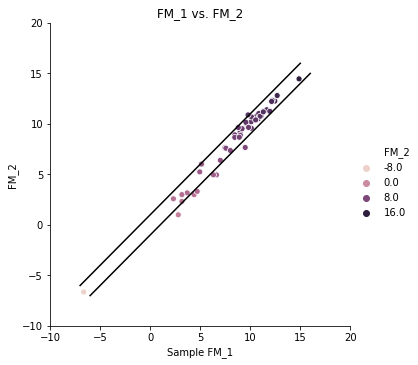

In [116]:
g = sns.relplot(x="FM_1", y="FM_2", data=df_log2,hue = 'FM_2')
plt.plot([-7,15],[-6,16],'k') # adding a line going from  (x,y) = (-7,-6) to (15,16); 'k' changes the color of the line to black
plt.plot([-6,16],[-7,15],'k') # adding a line going from  (x,y) = (-6,-7) to (16,15) 

# other customizations of the plot:
plt.xlim(-10, 20) # adjusting x axis limits
plt.ylim(-10, 20) # adjusting y axis limits
plt.xlabel('Sample FM_1') # renaming x axis title
plt.title('FM_1 vs. FM_2')
plt.show()

Notice that most of the points of this plot lie within the black lines, indicating the most of the genes have expression values that are within two-fold between the two samples. This suggests consistent expression values between replicates, and is a good sanity check that helps to signify that the data are of good quality.



***

Now, let's look at 2 samples belonging to different phenotypes.

### <font color=brown>Hands on practice</font>

Generate a scatter plot of `FM_1` and `UACC_62_1` with black lines demarcating 2-fold change. Do there appear to be more or less genes with large (>2) fold changes?


In [ ]:
# Generate a scatter plot of FM_1 and UACC_62_1 with black lines demarcating 2-fold change
None
plt.show()

### Plotting Distributions

Another common visualization is the histogram, to view the overall distribution of the data. To do this with `seaborn`, we can use the `distplot` function.

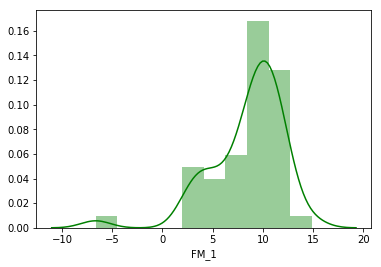

In [117]:
# Histogram
sns.distplot(df_log2['FM_1'],bins=10,color='green')
plt.show()

Note that the default distplot gives you both the histogram (in bars), as well as a fitted density plot, which estimates what the underlying distribution looks like. You can turn each of these visualizations off by adding the arguments `kde=False` or `hist=False` to the `distplot` function.

***

To compare distributions of two variables, you can use the `jointplot` function.

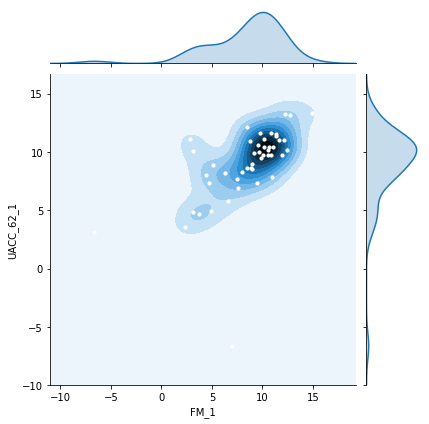

In [10]:
# Marginal Plot
g = sns.jointplot(x="FM_1",y="UACC_62_1",data=df_log2,kind="kde") # kind options: scatter, reg,resid,kde,hex
g.plot_joint(plt.scatter, c="w",s=10) # c = color; s = size ## Note that we can overlay 
plt.show()

### Categorical Plots

Remember that all of the libraries we have introduced expect each column to be a different variable and each row a different observation.

The dataset we're using consists of four different cell cell lines with three replicates of each. When comparing the samples to each other it makes sense to have the samples as the variable columns and have each gene be an 'observation' of how similar the samples are, gene by gene.

Now we want to look at the genes as variables, so we first transpose the data so that the genes are in the columns. 

In [123]:
# To look at gene expression, transpose the data frame so that the genes are in the columns.
dfT = df_log2.T

We also want to add categorical data for each sample so we can group or color by the 'Stage' or 'SampleName' variables. To do this, we need to add columns containing the phenotype information to our expression data frame, which we can pull form the `meta` data frame.

In [124]:
# Add the phenotype and sample ID information from the "meta" data frame
dfT['Stage'] = meta.Stage
dfT['SampleName'] = dfT.index

dfT.head()

gene_symbol,ANKIB1,ZNF618,IMPG2,SLC26A6,MAPKAPK3,DYNLT3,GRAMD3,MPDZ,DGKI,RCC2,...,CPAMD8,NBAS,ZNF24,MOB3A,EHF,LUM,PLEKHM3,IQCG,Stage,SampleName
Sample Title,,,,,,,,,,,,,,,,,,,,,
FM_1,11.332037,10.540128,3.700440,10.112440,10.664447,8.459432,8.455327,12.458663,5.129283,12.693051,...,4.954196,11.307770,12.138912,10.539159,-6.643856,2.807355,9.832890,8.011227,primary melanocytes,FM_1
FM_2,11.247928,10.492855,3.169925,9.575539,10.799282,8.915879,8.668885,12.259155,6.022368,12.809768,...,5.247928,11.189207,12.224303,10.393390,-6.643856,1.000000,9.652845,7.366322,primary melanocytes,FM_2
FM_3,11.013323,10.088788,3.906891,10.558421,10.487840,9.152285,8.797662,11.452756,5.930737,12.758640,...,4.754888,10.990104,11.882643,10.433585,0.000000,10.437752,9.231221,7.499846,primary melanocytes,FM_3
SK_MEL_28_1,11.363040,9.961450,2.000000,9.816984,9.903882,10.211888,8.257388,11.061371,9.092757,13.647908,...,3.459432,10.894818,11.394999,9.499846,0.000000,10.726218,9.224002,6.870365,metastatic,SK_MEL_28_1
SK_MEL_28_2,11.660887,10.087463,1.000000,10.142107,9.995767,10.583083,8.243174,11.350939,9.566054,13.796445,...,4.459432,11.100662,11.698705,9.465566,2.584963,11.088788,9.335390,7.348728,metastatic,SK_MEL_28_2


Now that the data frame is properly organized, we want to find a gene of interest to focus on in our plots. 

To do this, we'll calculate the gene with the maximum difference between normal and cancer cells.

Let's take a look at the metadata to remind ourselves how the data is structured.

In [118]:
print(meta)

             Sample_geo_accession                Stage           cell type
Sample Title                                                              
FM_1                   GSM2344965  primary melanocytes  normal melanocytes
FM_2                   GSM2344966  primary melanocytes  normal melanocytes
FM_3                   GSM2344967  primary melanocytes  normal melanocytes
SK_MEL_28_1            GSM2344968           metastatic  melanoma cell line
SK_MEL_28_2            GSM2344969           metastatic  melanoma cell line
SK_MEL_28_3            GSM2344970           metastatic  melanoma cell line
SK_MEL_147_1           GSM2344971           metastatic  melanoma cell line
SK_MEL_147_2           GSM2344972           metastatic  melanoma cell line
SK_MEL_147_3           GSM2344973           metastatic  melanoma cell line
UACC_62_1              GSM2344974           metastatic  melanoma cell line
UACC_62_2              GSM2344975           metastatic  melanoma cell line
UACC_62_3              GS

Note that the metadata tells us that the first 3 samples are normal, and the rest are metastatic.

We start by creating separate data frames for the Normal and the Metastatic samples.

In [119]:
#slicing out the normal and metastatic samples
FMnorm = df_log2.iloc[:,0:3]
Metastatic = df_log2.iloc[:,3:]

print(FMnorm.head())
print(Metastatic.head())

Sample Title       FM_1       FM_2       FM_3
gene_symbol                                  
ANKIB1        11.332037  11.247928  11.013323
ZNF618        10.540128  10.492855  10.088788
IMPG2          3.700440   3.169925   3.906891
SLC26A6       10.112440   9.575539  10.558421
MAPKAPK3      10.664447  10.799282  10.487840
Sample Title  SK_MEL_28_1  SK_MEL_28_2  SK_MEL_28_3  SK_MEL_147_1  \
gene_symbol                                                         
ANKIB1          11.363040    11.660887    11.624795     11.212496   
ZNF618           9.961450    10.087463     9.957102     10.927037   
IMPG2            2.000000     1.000000     2.584963      4.169925   
SLC26A6          9.816984    10.142107     9.936638      9.768184   
MAPKAPK3         9.903882     9.995767    10.075479     11.240791   

Sample Title  SK_MEL_147_2  SK_MEL_147_3  UACC_62_1  UACC_62_2  UACC_62_3  
gene_symbol                                                                
ANKIB1           10.897845     11.182394  

We'll then calculate the means of each of the phenotypes, and then calculate the difference of the means.

In [120]:
# Then calculating the means of each type
FMmean = FMnorm.mean(1)
MetastaticMean = Metastatic.mean(1)

# Calculating the difference of the means
MeanDiff = FMmean - MetastaticMean

# Finding the max and the minimum means
maxDiffGene = MeanDiff.idxmax()
minDiffGene = MeanDiff.idxmin()

print(MeanDiff.sort_values())

gene_symbol
EHF        -7.203594
FOXC1      -6.114591
LUM        -5.966445
DGKI       -2.543371
CHRNA7     -2.420790
DYNLT3     -2.186492
RPS6KA6    -1.625172
RECQL4     -1.579509
DTX3L      -1.125415
SULT1A1    -0.877127
ZNF343     -0.771921
NCMAP      -0.757974
RCC2       -0.655997
SHMT1      -0.655026
BCAP31     -0.634210
TAF1D      -0.570503
ZCCHC17    -0.442476
TMEM126B   -0.255220
ANKIB1     -0.225225
BMPR1A     -0.223518
PGBD2      -0.188765
GTF2H1     -0.176875
COL1A1     -0.051755
SLC35A3    -0.028610
SLC26A6    -0.026855
TMEM60     -0.018016
NBAS        0.002560
PLEKHM3     0.067130
MAPKAPK3    0.074834
ZNF618      0.103182
TRAPPC2B    0.146771
IMPG2       0.290161
IFT74       0.448409
DYNC2H1     0.462046
IQCG        0.555745
ZNF24       0.614500
GRAMD3      0.724286
MOB3A       0.744443
CPAMD8      0.756179
TSNAXIP1    1.163544
MARCKSL1    1.629882
WDR19       1.797676
MPDZ        1.818240
CDIP1       3.380546
MTSS1       3.830662
ELFN1       5.163275
KIF5A       5.405564
d

In [141]:
print(minDiffGene) #Note that gene of interest will be "KIF5A"
print(FMnorm.loc['FOXC1'])
print(Metastatic.loc['FOXC1'])

EHF
Sample Title
FM_1    3.169925
FM_2    2.321928
FM_3    4.584963
Name: FOXC1, dtype: float64
Sample Title
SK_MEL_28_1      7.845490
SK_MEL_28_2      8.262095
SK_MEL_28_3      8.348728
SK_MEL_147_1    10.200899
SK_MEL_147_2    10.159871
SK_MEL_147_3    10.258566
UACC_62_1       10.044394
UACC_62_2       10.112440
UACC_62_3       10.029287
Name: FOXC1, dtype: float64


There are many ways to plot categorical data like `bar`, `box` and `whisker`, `swarm` plots. Let's look at the expression of `AEBP1` using each of these methods. There are separate methods for each, but they are pulled together for convenience in one function, `catplot`.

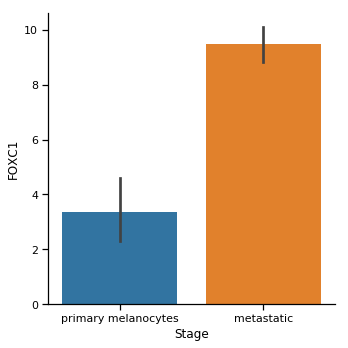

In [146]:
# Starting off with a bar plot
sns.set_context("notebook")
g = sns.catplot(x = 'Stage',y='FOXC1', data=dfT, kind="bar")
plt.show()
# Note that the error bars are plotted by default

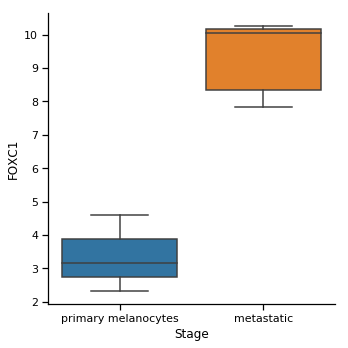

In [145]:
g = sns.catplot(x = 'Stage',y='FOXC1', data=dfT, kind="box")
plt.show()

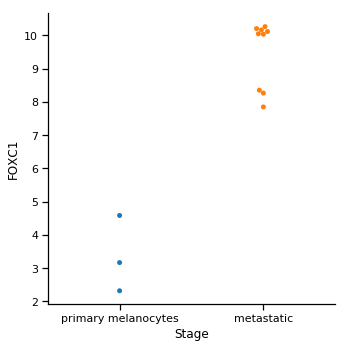

In [144]:
g = sns.catplot(x = 'Stage',y = 'FOXC1', data=dfT, kind="swarm")
plt.show()

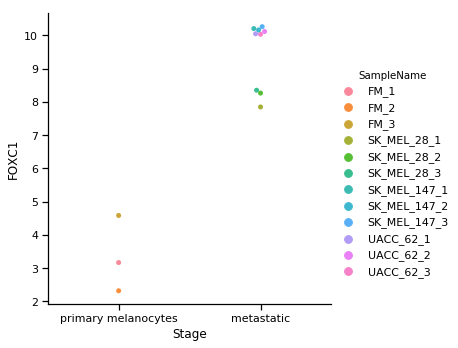

In [143]:
g = sns.catplot(x = 'Stage',y = 'FOXC1',hue = 'SampleName', data=dfT, kind="swarm")
plt.show()

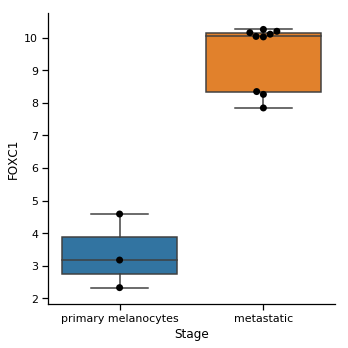

In [142]:
g = sns.catplot(x="Stage", y="FOXC1", kind="box", data=dfT)
sns.swarmplot(x="Stage", y="FOXC1", color="k", size=7, data=dfT, ax=g.ax);